# This workbook is created by: B. Citil

# Use the following command lines in Anaconda Prompt once to install the libraries.

To install Pyomo:  conda install -c conda-forge pyomo 

To install glpk solver:  conda install -c conda-forge glpk

# See the following links for Pyomo documentation
1- https://pyomo.readthedocs.io/en/stable/index.html </br>
2- https://www.ima.umn.edu/materials/2017-2018.2/W8.21-25.17/26326/3_PyomoFundamentals.pdf

# Solving the blending problem with Pyomo</br>
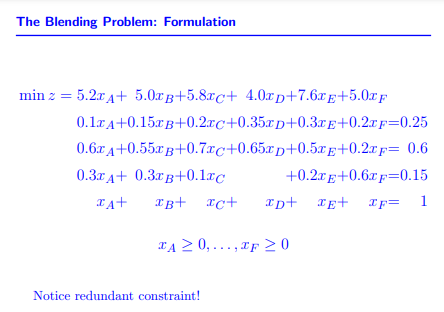

In [1]:
#Import the following librarires, run this each time the kernel is initated (i.e. this file is opened after closing Anaconda)
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
import sys

# Manually formulating and solving the problem

In [131]:
#MANUALLY formulating and solving the blending problem that is shown above

#Create the model object
model = pyo.ConcreteModel(name="The Blending Problem")

#Create the variable objects
indexListX=['A','B','C','D','E','F']
model.x = pyo.Var(indexListX, domain=pyo.NonNegativeReals)

#Define the objective function object
#Default objective is minimization. For maximization add: " sense=pyo.maximize " into the parentheses after pyo.Objective
model.objectiveFunction = pyo.Objective(expr = 5.2*model.x['A'] + 5*model.x['B'] + 5.8*model.x['C'] + 4*model.x['D'] +\
                          7.6*model.x['E'] + 5*model.x['F'])

#Define the constraint objects
model.Constraint1 = pyo.Constraint(expr = 0.1*model.x['A'] + 0.15*model.x['B'] + 0.2*model.x['C'] + 0.35*model.x['D'] +\
                          0.3*model.x['E'] + 0.2*model.x['F']==0.25)

model.Constraint2 = pyo.Constraint(expr = 0.6*model.x['A'] + 0.55*model.x['B'] + 0.7*model.x['C'] + 0.65*model.x['D'] +\
                          0.5*model.x['E'] + 0.2*model.x['F']==0.6)

model.Constraint3 = pyo.Constraint(expr = 0.3*model.x['A'] + 0.3*model.x['B'] + 0.1*model.x['C'] +\
                          0.2*model.x['E'] + 0.6*model.x['F']==0.15)

model.Constraint4 = pyo.Constraint(expr = model.x['A'] + model.x['B'] + model.x['C'] + model.x['D'] +\
                          model.x['E'] + model.x['F']==1)

#Include the following line to toggle on accessing the duals
model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)
#Include the following line to toggle on accessing the reduced costs
model.rc = pyo.Suffix(direction=pyo.Suffix.IMPORT)

#Create an optimizer object by using pyo.SolverFactory
opt = pyo.SolverFactory('glpk')


#Solve the model object by calling 'solve' function from the optimizer object, and pass the model object to the function, and create results object
results=opt.solve(model)

#Display the solution
model.display()

Model The Blending Problem

  Variables:
    x : Size=6, Index=x_index
        Key : Lower : Value              : Upper : Fixed : Stale : Domain
          A :     0 :  0.357142857142857 :  None : False : False : NonNegativeReals
          B :     0 :                0.0 :  None : False : False : NonNegativeReals
          C :     0 :                0.0 :  None : False : False : NonNegativeReals
          D :     0 :  0.571428571428571 :  None : False : False : NonNegativeReals
          E :     0 :                0.0 :  None : False : False : NonNegativeReals
          F :     0 : 0.0714285714285715 :  None : False : False : NonNegativeReals

  Objectives:
    objectiveFunction : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 4.499999999999998

  Constraints:
    Constraint1 : Size=1
        Key  : Lower : Body               : Upper
        None :  0.25 : 0.2499999999999998 :  0.25
    Constraint2 : Size=1
        Key  : Lower : Body               

# Access the solution parameters

In [132]:
#Access the all variable values
print('----------Accessing the all variable values---------')
for v in model.component_objects(pyo.Var, active=True):
    print("Variable",v)
    for index in v:
        print ("   ",index, pyo.value(v[index]))
        
#Access the value of the objective function
print ("\n ---------Access the value of the objective function----------")
print('Objective function value: ', pyo.value(model.objectiveFunction))

#Access the values of a spesific set of variables
# \n inside of a strint introduces a new line
print(f'\n ----------Access the values of a spesific set of variables---------')
for i in indexListX:
    print(f'{model.x[i]}: ', pyo.value(model.x[i]))

#Access the dual variable values (i.e. shadow prices)
print ("\n ---------Access the dual variable values for the manually named constraints with no index value----------")
for c in model.component_objects(pyo.Constraint, active=True):
    print ("Constraint: ",c, ', Corresponding dual variable value: ', model.dual[c])

#Access the corresponding dual variable value of a particular constraint
print ("\n ---------Access the corresponding dual variable value of a particular constraint----------")
print ("Constraint: ",model.Constraint1, ', Corresponding dual variable value: ', model.dual[model.Constraint1])

#Access the reduced costs
print('\n ----------Access the reduced costs of the all variables---------')
for v in model.component_objects(pyo.Var, active=True):
    print("Variable",v)
    for index in v:
        print (f'Reduced cost of x[{index}]:' , model.rc[v[index]])

#Access the slack values of the constraints
print ("\n ---------Access the slack value of the manually named constraints with no index value----------")
for c in model.component_objects(pyo.Constraint, active=True):
    print ("Constraint: ",c, ', lower slack value: ', c.lslack(), ', upper slack value: ', c.uslack())
    
#Access the solver time in seconds
print ("\n ---------Access the solver time in seconds----------")
print('Solver time:', results.solver.time)

----------Accessing the all variable values---------
Variable x
    A 0.357142857142857
    B 0.0
    C 0.0
    D 0.571428571428571
    E 0.0
    F 0.0714285714285715

 ---------Access the value of the objective function----------
Objective function value:  4.499999999999998

 ----------Access the values of a spesific set of variables---------
x[A]:  0.357142857142857
x[B]:  0.0
x[C]:  0.0
x[D]:  0.571428571428571
x[E]:  0.0
x[F]:  0.0714285714285715

 ---------Access the dual variable values for the manually named constraints with no index value----------
Constraint:  Constraint1 , Corresponding dual variable value:  -4.0
Constraint:  Constraint2 , Corresponding dual variable value:  0.0
Constraint:  Constraint3 , Corresponding dual variable value:  0.666666666666667
Constraint:  Constraint4 , Corresponding dual variable value:  5.4

 ---------Access the corresponding dual variable value of a particular constraint----------
Constraint:  Constraint1 , Corresponding dual variable value:

# Formulate and solve the problem when data provided as lists

In [123]:
#Formulating and solving the blending problem by providing data as a list.

#Create the model object
model = pyo.ConcreteModel(name="The Blending Problem")

#Create variable index list
#indexListX=['A','B','C','D','E','F']
indexListX=[1,2,3,4,5,6]

#Create constraint coefficients, (i.e. A of Ax<=b, assuming x is a column vector)
constraintCoefficients=[[0.1, 0.15, 0.2, 0.35, 0.3, 0.2],[0.6, 0.55, 0.7, 0.65, 0.5, 0.2], [0.3, 0.3, 0.1, 0, 0.2, 0.6],\
                       [1, 1, 1, 1, 1, 1]]

#Create constraint right hand sides, (i.e. b of Ax<=b, assuming x is a column vector)
constraintRightHandSides=[0.25, 0.6, 0.15, 1]

#Create the objective function coefficients (c of min cx, , assuming x is a column vector)
objectiveFunctionCoefficients=[5.2, 5, 5.8, 4, 7.6, 5]

#Create some useful parameters to help formulating the model
#Create a Python variable assigned the value of the number of variables in the model
numberOfVariables=len(indexListX)
numberOfConstraints=len(constraintCoefficients)

#Create the variable objects
#model.x = pyo.Var(indexListX, domain=pyo.NonNegativeReals)

model.x = pyo.VarList(domain=pyo.NonNegativeReals)
for i in range(numberOfVariables):
    model.x.add()

#Define the objective function object
#Default objective is minimization. For maximization add: " sense=pyo.maximize " into the parentheses after pyo.Objective
temp_expr = 0
for i in range(numberOfVariables):
    temp_expr+=(objectiveFunctionCoefficients[i]*model.x[indexListX[i]])
model.objectiveFunction = pyo.Objective(expr = temp_expr)


#Define the constraint objects
model.ConstraintSet=pyo.ConstraintList()
for j in range(numberOfConstraints):
    model.ConstraintSet.add(sum(constraintCoefficients[j][i]*model.x[indexListX[i]] for i in range(numberOfVariables))==constraintRightHandSides[j])

#Include the following line to toggle on accessing the duals
model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)
#Include the following line to toggle on accessing the reduced costs
model.rc = pyo.Suffix(direction=pyo.Suffix.IMPORT)

#Create an optimizer object by using pyo.SolverFactory
opt = pyo.SolverFactory('glpk')


#Solve the model object by calling 'solve' function from the optimizer object, and pass the model object to the function
opt.solve(model)

{'Problem': [{'Name': 'unknown', 'Lower bound': 4.5, 'Upper bound': 4.5, 'Number of objectives': 1, 'Number of constraints': 5, 'Number of variables': 7, 'Number of nonzeros': 24, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.03798508644104004}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [130]:
#Access the all variable values
print('----------Accessing the all variable values---------')
for v in model.component_objects(pyo.Var, active=True):
    print("Variable",v)
    for index in v:
        print ("   ",index, pyo.value(v[index]))
        
#Access the value of the objective function
print ("\n ---------Access the value of the objective function----------")
print('Objective function value: ', pyo.value(model.objectiveFunction))

#Access the values of a spesific set of variables
# \n inside of a strint introduces a new line
print(f'\n ----------Access the values of a spesific set of variables---------')
for i in indexListX:
    print(f'{model.x[i]}: ', pyo.value(model.x[i]))

#Access the dual variable values (i.e. shadow prices)
print ("\n ---------Access the dual variable values for the manually named constraints with no index value----------")
for c in model.component_objects(pyo.Constraint, active=True):
    for index in c:
        print ("Constraint: ",c[index], ', Corresponding dual variable value: ', model.dual[c[index]])

#Access the corresponding dual variable value of a particular constraint
print ("\n ---------Access the corresponding dual variable value of a particular constraint----------")
print ("Constraint: ",model.ConstraintSet[1], ', Corresponding dual variable value: ', model.dual[model.ConstraintSet[1]])

#Access the reduced costs
print('\n ----------Access the reduced costs of the all variables---------')
for v in model.component_objects(pyo.Var, active=True):
    print("Variable",v)
    for index in v:
        print (f'Reduced cost of x[{index}]:' , model.rc[v[index]])

#Access the slack values of the constraints
print ("\n ---------Access the slack value of the manually named constraints with no index value----------")
for c in model.component_objects(pyo.Constraint, active=True):
    for index in c:
        print ("Constraint: ",c[index], ', lower slack value: ', c[index].lslack(), ', upper slack value: ', c[index].uslack())
    
#Access the solver time in seconds
print ("\n ---------Access the solver time in seconds----------")
print('Solver time:', results.solver.time)

----------Accessing the all variable values---------
Variable x
    1 0.357142857142857
    2 0.0
    3 0.0
    4 0.571428571428571
    5 0.0
    6 0.0714285714285715

 ---------Access the value of the objective function----------
Objective function value:  4.499999999999998

 ----------Access the values of a spesific set of variables---------
x[1]:  0.357142857142857
x[2]:  0.0
x[3]:  0.0
x[4]:  0.571428571428571
x[5]:  0.0
x[6]:  0.0714285714285715

 ---------Access the dual variable values for the manually named constraints with no index value----------
Constraint:  ConstraintSet[1] , Corresponding dual variable value:  -4.0
Constraint:  ConstraintSet[2] , Corresponding dual variable value:  0.0
Constraint:  ConstraintSet[3] , Corresponding dual variable value:  0.666666666666667
Constraint:  ConstraintSet[4] , Corresponding dual variable value:  5.4

 ---------Access the corresponding dual variable value of a particular constraint----------
Constraint:  ConstraintSet[1] , Correspon

# A Baby LP:
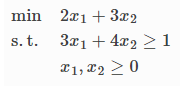

In [2]:
#A small concrete model example as shown above - Baby LP
model = pyo.ConcreteModel()

model.x = pyo.Var([1,2], domain=pyo.NonNegativeReals)

model.OBJ = pyo.Objective(expr = 2*model.x[1] + 3*model.x[2])

model.Constraint1 = pyo.Constraint(expr = 3*model.x[1] + 4*model.x[2] >= 1)

opt = pyo.SolverFactory('glpk')

opt.solve(model)

{'Problem': [{'Name': 'unknown', 'Lower bound': 0.666666666666667, 'Upper bound': 0.666666666666667, 'Number of objectives': 1, 'Number of constraints': 2, 'Number of variables': 3, 'Number of nonzeros': 3, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.05904793739318848}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}